<a href="https://colab.research.google.com/github/anapaulacerqueira/tcc/blob/master/tech4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install streamlit

In [ ]:
pip install pandas

In [ ]:
pip install scikit-learn

In [ ]:
pip install joblib

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Carregar dataset
df = pd.read_csv("Obesity.csv")

# Separar features e alvo
X = df.drop("Obesity", axis=1)
y = df["Obesity"]

# Colunas
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

# Pré-processamento
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# Modelo
model = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)

# Pipeline
pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", model)
])

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Treinar
pipe.fit(X_train, y_train)

# Avaliar
y_pred = pipe.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {acc:.2%}")

# SALVAR MODELO
joblib.dump(pipe, "model.pkl")

print("Modelo salvo com sucesso como model.pkl")

Acurácia do modelo: 93.62%
Modelo salvo com sucesso como model.pkl


In [ ]:
import streamlit as st
import pandas as pd
import joblib


# Configuração da página
st.set_page_config(
    page_title="Predição de Obesidade",
    layout="centered"
)

# Título
st.title("Sistema Preditivo de Obesidade")
st.write(
    """
    Esta aplicação utiliza um modelo de Machine Learning para auxiliar a equipe médica
    na predição do nível de obesidade de um paciente, com base em dados clínicos e
    comportamentais.
    """
)

# Carregamento do modelo treinado
model = joblib.load("model.pkl")

# Função para coletar dados do usuário
def user_input_features():
    st.subheader("Dados do Paciente")

    gender = st.selectbox("Gênero", ["Male", "Female"])
    age = st.slider("Idade", 14, 61, 30)
    height = st.slider("Altura (m)", 1.40, 2.00, 1.70)
    weight = st.slider("Peso (kg)", 40, 170, 70)

    family_history = st.selectbox(
        "Histórico familiar de excesso de peso?",
        ["yes", "no"]
    )

    favc = st.selectbox(
        "Consome alimentos altamente calóricos com frequência?",
        ["yes", "no"]
    )

    ncp = st.slider(
        "Número de refeições principais por dia",
        1, 4, 3
    )

    caec = st.selectbox(
        "Consome alimentos entre as refeições?",
        ["no", "Sometimes", "Frequently", "Always"]
    )

    smoke = st.selectbox(
        "Fuma?",
        ["yes", "no"]
    )

    ch2o = st.slider(
        "Consumo diário de água (1 = <1L, 3 = >2L)",
        1, 3, 2
    )

    scc = st.selectbox(
        "Monitora a ingestão de calorias?",
        ["yes", "no"]
    )

    faf = st.slider(
        "Frequência de atividade física (0 = nenhuma, 3 = alta)",
        0, 3, 1
    )

    tue = st.slider(
        "Tempo diário em dispositivos eletrônicos (0 = baixo, 2 = alto)",
        0, 2, 1
    )

    calc = st.selectbox(
        "Consumo de álcool",
        ["no", "Sometimes", "Frequently", "Always"]
    )

    mtrans = st.selectbox(
        "Meio de transporte utilizado",
        [
            "Automobile",
            "Motorbike",
            "Bike",
            "Public_Transportation",
            "Walking"
        ]
    )

    data = {
        "Gender": gender,
        "Age": age,
        "Height": height,
        "Weight": weight,
        "family_history": family_history,
        "FAVC": favc,
        "NCP": ncp,
        "CAEC": caec,
        "SMOKE": smoke,
        "CH2O": ch2o,
        "SCC": scc,
        "FAF": faf,
        "TUE": tue,
        "CALC": calc,
        "MTRANS": mtrans
    }

    return pd.DataFrame([data])

# Entrada de dados
input_df = user_input_features()

# Botão de predição
if st.button("Realizar Predição"):
    prediction = model.predict(input_df)

    st.subheader("Resultado da Predição")
    st.success(f"Nível de obesidade previsto: **{prediction[0]}**")

    st.write(
        """
        ⚠️ **Observação:**
        Este sistema tem caráter de apoio à decisão clínica e não substitui
        a avaliação médica especializada.
        """
    )

2026-01-06 01:01:44.384 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-06 01:01:44.387 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-06 01:01:44.388 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-06 01:01:44.389 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-06 01:01:44.390 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-06 01:01:44.391 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-06 01:01:44.392 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-06 01:01:44.508 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

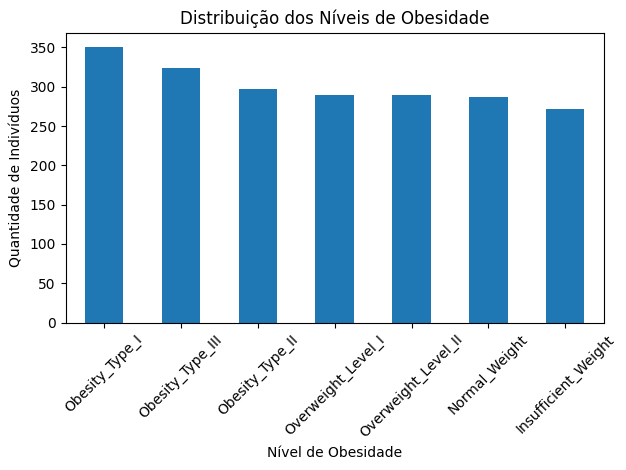

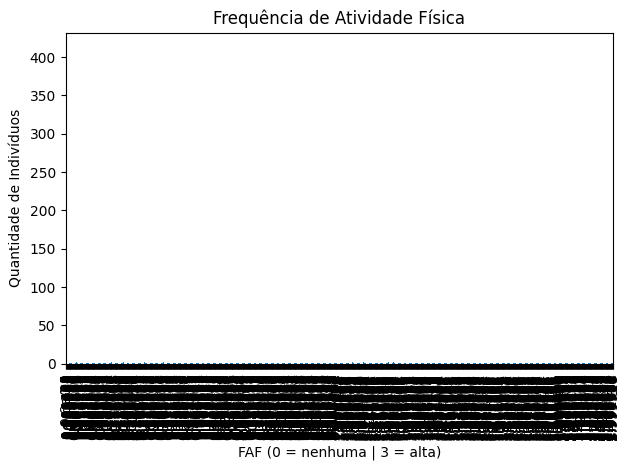

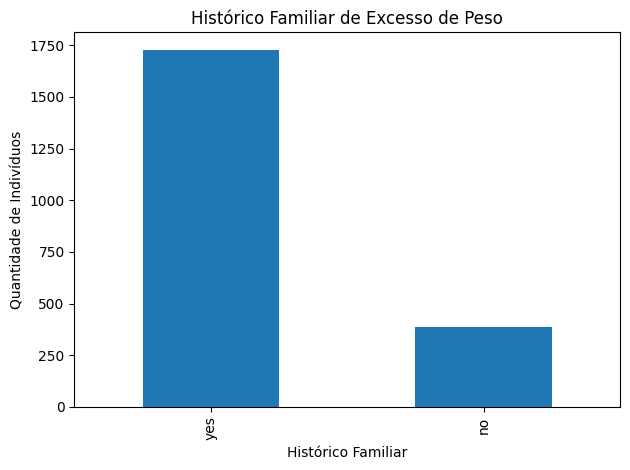

In [ ]:
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv("Obesity.csv")

# ================================
# GRÁFICO 1 – Distribuição dos níveis de obesidade
# ================================
plt.figure()
df["Obesity"].value_counts().plot(kind="bar")
plt.title("Distribuição dos Níveis de Obesidade")
plt.xlabel("Nível de Obesidade")
plt.ylabel("Quantidade de Indivíduos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ================================
# GRÁFICO 2 – Frequência de Atividade Física
# ================================
plt.figure()
df["FAF"].value_counts().sort_index().plot(kind="bar")
plt.title("Frequência de Atividade Física")
plt.xlabel("FAF (0 = nenhuma | 3 = alta)")
plt.ylabel("Quantidade de Indivíduos")
plt.tight_layout()
plt.show()

# ================================
# GRÁFICO 3 – Histórico Familiar de Obesidade
# ================================
plt.figure()
df["family_history"].value_counts().plot(kind="bar")
plt.title("Histórico Familiar de Excesso de Peso")
plt.xlabel("Histórico Familiar")
plt.ylabel("Quantidade de Indivíduos")
plt.tight_layout()
plt.show()